In [1]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [215]:
## NN libs
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
import keras
from keras import regularizers
from keras import backend as K, metrics
from keras.utils import to_categorical, plot_model
from keras.layers import Input, Dense, Activation, Conv1D, Conv2D, Dropout, Flatten, Lambda
from keras.layers import Conv2DTranspose, Reshape, MaxPooling2D, UpSampling2D, UpSampling1D, MaxPooling1D
from keras.layers import LocallyConnected1D, LocallyConnected2D
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model
from keras.callbacks import TensorBoard

In [3]:
# local libs
import config, models, functions
from data import data, midi, midi_generators as g
from utils import io, models_io, utils

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_instances = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]



In [4]:
context = data.init()
n = 2
multiTrack = False
context, x_train, labels = data.import_data(data.init(), n, multiTrack=multiTrack)

Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Importing midi-data

 [INFO] : 
 |  reading file: ../datasets/examples/01 16th Snare.mid
 [INFO] : 
 |  reading file: ../datasets/examples/01 8th Cym.mid

Encoding midi-data
 [<midi file '../datasets/examples/01 16th Snare.mid' type 0, 1 tracks, 182 messages>, <midi file '../datasets/examples/01 8th Cym.mid' type 0, 1 tracks, 68 messages>]
> -> multi-track = False
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.994791666666667
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9947916666666665
 |>  150


In [5]:
n = 100
min_f = 3
max_f = 20
# x_train = g.gen_data(context, n, max_f=max_f, min_f=min_f)
x_train = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f, multiTrack=multiTrack)
y_train = x_train
x_test = x_train[-10:]
x_train = x_train[:-10]

 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.991666666666667
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9906250000000014
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9906250000000023
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9968750000000024
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.996875000000002
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9979166666666677
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9989583333333325
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.994791666666668
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.002083333333335
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9947916666666687
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9937500000000012
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9979166666666694
 |>  150
 [DEBUG]

 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.990625000000001
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.0072916666666663
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9947916666666683
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9958333333333336
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9927083333333364
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.996875000000001
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.992708333333336
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.000000000000002
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.002083333333338
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.002083333333334
 |>  150


In [6]:
x_train.shape

(269, 150, 1)

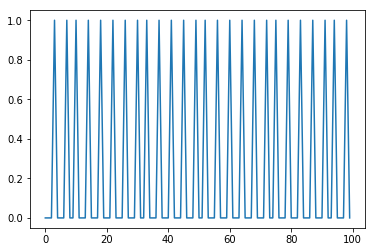

In [7]:
plt.plot(x_train[0,:100])

In [8]:
x_train.shape

(269, 150, 1)

In [9]:
n_samples = x_train[0]
input_shape = x_train.shape[1:] # shape of a single sample
output_shape = y_train.shape[1:] # shape of a single sample
# output_length = y_train.shape[1:][0]
input_shape

(150, 1)

In [10]:
output_shape

(150, 1)

In [11]:
num_encoder_tokens = x_train.shape[-1]
num_decoder_tokens = y_train.shape[-1]
# latent_dim = 1

In [12]:
k_reg = regularizers.l2(0.01) # 10e-5
# b_reg = regularizers.l1(0.01)
a_reg = regularizers.l1(0.01) # 10e-5

In [13]:
input_shape
# input_shape = (150,)
input_shape

(150, 1)

In [200]:
batch_size = 32
original_dim = 150
latent_dim = 50
intermediate_dim = 150
epsilon_std = 1.0

In [248]:
# TODO Batch Normalization

In [187]:
def sampling(args, latent_dim, epsilon_std):
    z_mean, z_log_var = args
    # epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=epsilon_std)
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [249]:
k_reg = regularizers.l2(1e-5)
# b_reg = regularizers.l1(0.01)
a_reg = regularizers.l1(1e-5)

def encoder(latent_dim, input_shape, intermediate_dim = 150):
    encoder_input = Input(shape=input_shape, name='encoder_input-')
    h = encoder_input
    
    # Convolve & Pool
    # TODO use 2D data, with (2,1) shaped filters to reduce channel bleed
    h = Conv1D(10, kernel_size=2, strides=2, activation='relu', padding='same')(h)
    h = Conv1D(10, kernel_size=2, strides=1, activation='relu', padding='same')(h)
    h = MaxPooling1D(pool_size=2, strides=2, padding='same')(h)
    
    # Dense layers
    h = Flatten()(h)
    h = Dense(500, activation='relu')(h)
    h = Dense(500, activation='relu')(h)
    h = Dropout(0.1)(h)
    # h = Dense(intermediate_dim, activation='relu', kernel_regularizer=k_reg, activity_regularizer=a_reg)(h)

    # Mean, Variance
    # h = Dense(intermediate_dim, activation='relu', name='encoder_h-')(h)
    z_mean = Dense(latent_dim, name='z_mean')(h) # , activation='relu'
    z_log_var = Dense(latent_dim, name='z_log_var')(h) # , activation='relu'

    encoder_output = [z_mean, z_log_var]
    encoder_model = Model(encoder_input, encoder_output, name='encoder_model-')
    return encoder_model, z_mean, z_log_var, encoder_input

def z_(latent_dim, epsilon_std):
    # sample z from a distribution defined by [input_mean, input_log_var]
    # input :: [z_mean, z_log_var]
    z_input = [Input(shape=(latent_dim,)), Input(shape=(latent_dim,))]
    sampling_ = lambda args: sampling(args, latent_dim, epsilon_std)
    z_output = Lambda(sampling_, name='z_sampler-')(z_input)
    # z_output = Lambda(sampling_, output_shape=(latent_dim,), name='z_sampler-')(z_input)
    z_model = Model(z_input, z_output, name='z_model-')
    return z_model

def decoder(latent_dim, input_shape, intermediate_dim = 150):
    z_input = Input(shape=(latent_dim,), name='decoder_input-')
    decoder_h = Dense(intermediate_dim, activation='relu', name='decoder_h-')
    h = decoder_h(z_input)
    
    # Convolve & Pool
    h = Reshape((25,3,2))(h) # 75 * 2 = 150
    # h = UpSampling1D(2)(h)
    h = UpSampling2D((2,2))(h)
    h = Conv2DTranspose(10, kernel_size=2, strides=1, activation='relu', padding='same')(h)
    h = Conv2DTranspose(10, kernel_size=2, strides=1, activation='relu', padding='same')(h)
    h = MaxPooling2D(pool_size=2, strides=2, padding='same')(h)
    
    # h = UpSampling2D(2)(h)
#     h = Conv2DTranspose(20, kernel_size=2, strides=2, activation='relu', padding='same')(h)
#     h = Conv2DTranspose(20, kernel_size=2, strides=1, activation='relu', padding='same')(h)
#     h = MaxPooling1D(pool_size=2, strides=2, padding='same')(h)
    
    h = Flatten()(h)
    # h = Dense(intermediate_dim * 4, activation='relu')(h)
#     h = Dense(intermediate_dim, activation='relu', kernel_regularizer=k_reg, activity_regularizer=a_reg)(h)
    # h = Dropout(0.01)(h)
    
    # Mean
    # h = Conv2DTranspose(filters=1, kernel_size=3, padding='same')(h)
    # decoder_mean = Activation('sigmoid', name='decoder_output')
    decoder_mean = Dense(original_dim, activation='sigmoid', name='decoder_mean-')
    x_decoded_mean = decoder_mean(h)
    h = Reshape(input_shape)(x_decoded_mean)
    decoder_output = h
    model = Model(inputs=z_input, outputs=decoder_output, name='decoder_model-')
    return model

In [250]:
encoder_model, z_mean, z_log_var, encoder_input = encoder(latent_dim, input_shape)
z_model = z_(latent_dim, epsilon_std)
decoder_model = decoder(latent_dim, input_shape)


encoder_model.summary()
z_model.summary()
decoder_model.summary()
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input- (InputLayer)     (None, 150, 1)       0                                            
__________________________________________________________________________________________________
conv1d_139 (Conv1D)             (None, 75, 10)       30          encoder_input-[0][0]             
__________________________________________________________________________________________________
conv1d_140 (Conv1D)             (None, 75, 10)       210         conv1d_139[0][0]                 
__________________________________________________________________________________________________
max_pooling1d_71 (MaxPooling1D) (None, 38, 10)       0           conv1d_140[0][0]                 
__________________________________________________________________________________________________
flatten_66

In [251]:
vae_input = Input(shape=input_shape)
# vae_input = Input(shape=(150,1))
vae_input = encoder_input # WHY ?
vae_output = decoder_model(z_model(encoder_model(vae_input)))
# vae_output = decoder_model(z)
vae = Model(vae_input, vae_output)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input- (InputLayer)     (None, 150, 1)       0                                            
__________________________________________________________________________________________________
encoder_model- (Model)          [(None, 50), (None,  491340      encoder_input-[0][0]             
__________________________________________________________________________________________________
z_model- (Model)                (None, 50)           0           encoder_model-[1][0]             
                                                                 encoder_model-[1][1]             
__________________________________________________________________________________________________
decoder_model- (Model)          (None, 150, 1)       120800      z_model-[1][0]                   
Total para

In [252]:
def vae_loss(y_true, y_pred, z_mean, z_log_var):
    xent_loss = K.binary_crossentropy(y_true, y_pred)
    # K.reduce_mean
    kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    # kl_loss = - 0.5 * K.sum(1 + K.flatten(z_log_var) - K.square(K.flatten(z_mean)) - K.exp(K.flatten(z_log_var)), axis=-1)
    return xent_loss + kl_loss

In [253]:
metrics = ['acc','mse','mae']
# loss = 'binary_crossentropy'#  sparse_categorical_crossentropy
loss = lambda y_true, y_pred: vae_loss(y_true, y_pred, z_mean, z_log_var)
optimizer = 'rmsprop' # adam adadelta rmsprop nadam
# keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
vae.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [254]:
# # xent_loss = original_dim * keras.metrics.binary_crossentropy(vae_input, vae_output)
# # xent_loss = keras.metrics.binary_crossentropy(vae_input, vae_output)
# xent_loss = np.prod(input_shape) * keras.metrics.binary_crossentropy(vae_input, vae_output)
# # kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
# kl_loss = - 0.5 * K.sum(1 + K.flatten(z_log_var) - K.square(K.flatten(z_mean)) - K.exp(K.flatten(z_log_var)), axis=-1)

# vae_loss = K.mean(xent_loss + kl_loss)

# vae.add_loss(vae_loss)
# vae.compile(optimizer='rmsprop', metrics=['binary_accuracy','mae'])

In [255]:
# z_train = x_train
# x_train = x_train.reshape(x_train.shape[0],np.prod(x_train.shape[1:]))
x_train.shape

(269, 150, 1)

In [256]:
epochs = 100
m = 32*3 * (9/8)
vs = 1/8
shuffle = True
callbacks = []
callbacks = [TensorBoard(log_dir=config.tmp_log_dir)]
# model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[TensorBoard(log_dir=config.tmp_log_dir)])
history = vae.fit(x_train[:m], x_train[:m], epochs=epochs, batch_size=batch_size,
          validation_split=vs, callbacks=callbacks, shuffle=shuffle)
# history = vae.fit(x_train[:m], shuffle=False, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))

Train on 84 samples, validate on 12 samples
Epoch 1/500
84/84 [==============================] - 1s 9ms/step - loss: 0.6745 - acc: 0.5999 - mean_squared_error: 0.2375 - mean_absolute_error: 0.4771 - val_loss: 0.6037 - val_acc: 0.7244 - val_mean_squared_error: 0.2061 - val_mean_absolute_error: 0.4315
Epoch 2/500
84/84 [==============================] - 0s 1ms/step - loss: 0.6192 - acc: 0.6962 - mean_squared_error: 0.2136 - mean_absolute_error: 0.4309 - val_loss: 0.5894 - val_acc: 0.7311 - val_mean_squared_error: 0.1998 - val_mean_absolute_error: 0.4126
Epoch 3/500
84/84 [==============================] - 0s 1ms/step - loss: 0.6147 - acc: 0.6974 - mean_squared_error: 0.2113 - mean_absolute_error: 0.4214 - val_loss: 0.5959 - val_acc: 0.7317 - val_mean_squared_error: 0.2025 - val_mean_absolute_error: 0.4131
Epoch 4/500
84/84 [==============================] - 0s 2ms/step - loss: 0.6179 - acc: 0.6975 - mean_squared_error: 0.2129 - mean_absolute_error: 0.4250 - val_loss: 0.5964 - val_acc: 0.

Epoch 33/500
84/84 [==============================] - 0s 1ms/step - loss: 0.6034 - acc: 0.6983 - mean_squared_error: 0.2028 - mean_absolute_error: 0.4060 - val_loss: 0.5689 - val_acc: 0.7322 - val_mean_squared_error: 0.1858 - val_mean_absolute_error: 0.3718
Epoch 34/500
84/84 [==============================] - 0s 1ms/step - loss: 0.6043 - acc: 0.6983 - mean_squared_error: 0.2032 - mean_absolute_error: 0.4035 - val_loss: 0.5742 - val_acc: 0.7322 - val_mean_squared_error: 0.1884 - val_mean_absolute_error: 0.3903
Epoch 35/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5990 - acc: 0.6984 - mean_squared_error: 0.2009 - mean_absolute_error: 0.4020 - val_loss: 0.5605 - val_acc: 0.7339 - val_mean_squared_error: 0.1826 - val_mean_absolute_error: 0.3716
Epoch 36/500
84/84 [==============================] - 0s 971us/step - loss: 0.5993 - acc: 0.6985 - mean_squared_error: 0.2004 - mean_absolute_error: 0.3998 - val_loss: 0.5756 - val_acc: 0.7322 - val_mean_squared_error: 0.1907 

Epoch 65/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5949 - acc: 0.6996 - mean_squared_error: 0.1984 - mean_absolute_error: 0.3963 - val_loss: 0.5640 - val_acc: 0.7350 - val_mean_squared_error: 0.1840 - val_mean_absolute_error: 0.3712
Epoch 66/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5931 - acc: 0.7001 - mean_squared_error: 0.1983 - mean_absolute_error: 0.3990 - val_loss: 0.5593 - val_acc: 0.7350 - val_mean_squared_error: 0.1813 - val_mean_absolute_error: 0.3792
Epoch 67/500
84/84 [==============================] - 0s 971us/step - loss: 0.5986 - acc: 0.7000 - mean_squared_error: 0.1993 - mean_absolute_error: 0.4005 - val_loss: 0.5624 - val_acc: 0.7356 - val_mean_squared_error: 0.1787 - val_mean_absolute_error: 0.3677
Epoch 68/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5972 - acc: 0.7037 - mean_squared_error: 0.1979 - mean_absolute_error: 0.3953 - val_loss: 0.5560 - val_acc: 0.7217 - val_mean_squared_error: 0.1805 

Epoch 97/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5917 - acc: 0.7085 - mean_squared_error: 0.1976 - mean_absolute_error: 0.3979 - val_loss: 0.5553 - val_acc: 0.7383 - val_mean_squared_error: 0.1772 - val_mean_absolute_error: 0.3389
Epoch 98/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5954 - acc: 0.7057 - mean_squared_error: 0.1982 - mean_absolute_error: 0.3894 - val_loss: 0.5623 - val_acc: 0.7444 - val_mean_squared_error: 0.1812 - val_mean_absolute_error: 0.3666
Epoch 99/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5867 - acc: 0.7075 - mean_squared_error: 0.1945 - mean_absolute_error: 0.3899 - val_loss: 0.5518 - val_acc: 0.7278 - val_mean_squared_error: 0.1776 - val_mean_absolute_error: 0.3565
Epoch 100/500
84/84 [==============================] - 0s 977us/step - loss: 0.5937 - acc: 0.7060 - mean_squared_error: 0.1974 - mean_absolute_error: 0.4008 - val_loss: 0.5677 - val_acc: 0.7378 - val_mean_squared_error: 0.1842

Epoch 129/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5856 - acc: 0.7127 - mean_squared_error: 0.1939 - mean_absolute_error: 0.3860 - val_loss: 0.5866 - val_acc: 0.7244 - val_mean_squared_error: 0.1926 - val_mean_absolute_error: 0.3762
Epoch 130/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5937 - acc: 0.7092 - mean_squared_error: 0.1973 - mean_absolute_error: 0.3926 - val_loss: 0.5685 - val_acc: 0.7322 - val_mean_squared_error: 0.1846 - val_mean_absolute_error: 0.3829
Epoch 131/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5897 - acc: 0.7113 - mean_squared_error: 0.1955 - mean_absolute_error: 0.3919 - val_loss: 0.5521 - val_acc: 0.7394 - val_mean_squared_error: 0.1776 - val_mean_absolute_error: 0.3685
Epoch 132/500
84/84 [==============================] - 0s 1ms/step - loss: 0.6023 - acc: 0.7006 - mean_squared_error: 0.2009 - mean_absolute_error: 0.4037 - val_loss: 0.5684 - val_acc: 0.7494 - val_mean_squared_error: 0.177

Epoch 161/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5945 - acc: 0.7081 - mean_squared_error: 0.1974 - mean_absolute_error: 0.3929 - val_loss: 0.5705 - val_acc: 0.7456 - val_mean_squared_error: 0.1836 - val_mean_absolute_error: 0.3878
Epoch 162/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5942 - acc: 0.7126 - mean_squared_error: 0.1956 - mean_absolute_error: 0.3934 - val_loss: 0.5620 - val_acc: 0.7394 - val_mean_squared_error: 0.1813 - val_mean_absolute_error: 0.3725
Epoch 163/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5893 - acc: 0.7087 - mean_squared_error: 0.1951 - mean_absolute_error: 0.3902 - val_loss: 0.5616 - val_acc: 0.7333 - val_mean_squared_error: 0.1824 - val_mean_absolute_error: 0.3753
Epoch 164/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5924 - acc: 0.7049 - mean_squared_error: 0.1968 - mean_absolute_error: 0.3981 - val_loss: 0.5604 - val_acc: 0.7361 - val_mean_squared_error: 0.179

Epoch 193/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5907 - acc: 0.7100 - mean_squared_error: 0.1950 - mean_absolute_error: 0.3960 - val_loss: 0.5613 - val_acc: 0.7517 - val_mean_squared_error: 0.1791 - val_mean_absolute_error: 0.3406
Epoch 194/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5916 - acc: 0.7118 - mean_squared_error: 0.1956 - mean_absolute_error: 0.3872 - val_loss: 0.5579 - val_acc: 0.7439 - val_mean_squared_error: 0.1782 - val_mean_absolute_error: 0.3446
Epoch 195/500
84/84 [==============================] - 0s 981us/step - loss: 0.5897 - acc: 0.7154 - mean_squared_error: 0.1949 - mean_absolute_error: 0.3890 - val_loss: 0.5685 - val_acc: 0.7422 - val_mean_squared_error: 0.1811 - val_mean_absolute_error: 0.3483
Epoch 196/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5861 - acc: 0.7156 - mean_squared_error: 0.1936 - mean_absolute_error: 0.3858 - val_loss: 0.5589 - val_acc: 0.7378 - val_mean_squared_error: 0.1

Epoch 225/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5888 - acc: 0.7119 - mean_squared_error: 0.1946 - mean_absolute_error: 0.3941 - val_loss: 0.5581 - val_acc: 0.7344 - val_mean_squared_error: 0.1807 - val_mean_absolute_error: 0.3654
Epoch 226/500
84/84 [==============================] - 0s 994us/step - loss: 0.5854 - acc: 0.7135 - mean_squared_error: 0.1940 - mean_absolute_error: 0.3838 - val_loss: 0.5689 - val_acc: 0.7406 - val_mean_squared_error: 0.1848 - val_mean_absolute_error: 0.3811
Epoch 227/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5879 - acc: 0.7112 - mean_squared_error: 0.1945 - mean_absolute_error: 0.3886 - val_loss: 0.5644 - val_acc: 0.7278 - val_mean_squared_error: 0.1824 - val_mean_absolute_error: 0.3702
Epoch 228/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5892 - acc: 0.7106 - mean_squared_error: 0.1952 - mean_absolute_error: 0.3897 - val_loss: 0.5798 - val_acc: 0.7317 - val_mean_squared_error: 0.1

84/84 [==============================] - 0s 1ms/step - loss: 0.5911 - acc: 0.7090 - mean_squared_error: 0.1957 - mean_absolute_error: 0.3923 - val_loss: 0.5630 - val_acc: 0.7333 - val_mean_squared_error: 0.1797 - val_mean_absolute_error: 0.3573
Epoch 257/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5928 - acc: 0.7089 - mean_squared_error: 0.1948 - mean_absolute_error: 0.3857 - val_loss: 0.5785 - val_acc: 0.7328 - val_mean_squared_error: 0.1881 - val_mean_absolute_error: 0.3801
Epoch 258/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5921 - acc: 0.7046 - mean_squared_error: 0.1963 - mean_absolute_error: 0.3918 - val_loss: 0.5583 - val_acc: 0.7478 - val_mean_squared_error: 0.1765 - val_mean_absolute_error: 0.3674
Epoch 259/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5887 - acc: 0.7131 - mean_squared_error: 0.1933 - mean_absolute_error: 0.3880 - val_loss: 0.5543 - val_acc: 0.7378 - val_mean_squared_error: 0.1759 - val_mean_a

Epoch 288/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5847 - acc: 0.7153 - mean_squared_error: 0.1928 - mean_absolute_error: 0.3839 - val_loss: 0.5588 - val_acc: 0.7311 - val_mean_squared_error: 0.1791 - val_mean_absolute_error: 0.3662
Epoch 289/500
84/84 [==============================] - 0s 995us/step - loss: 0.5856 - acc: 0.7163 - mean_squared_error: 0.1928 - mean_absolute_error: 0.3862 - val_loss: 0.5563 - val_acc: 0.7428 - val_mean_squared_error: 0.1772 - val_mean_absolute_error: 0.3562
Epoch 290/500
84/84 [==============================] - 0s 977us/step - loss: 0.5861 - acc: 0.7129 - mean_squared_error: 0.1936 - mean_absolute_error: 0.3876 - val_loss: 0.5537 - val_acc: 0.7600 - val_mean_squared_error: 0.1738 - val_mean_absolute_error: 0.3556
Epoch 291/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5944 - acc: 0.7089 - mean_squared_error: 0.1963 - mean_absolute_error: 0.3921 - val_loss: 0.5611 - val_acc: 0.7411 - val_mean_squared_error: 0

Epoch 320/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5906 - acc: 0.7159 - mean_squared_error: 0.1947 - mean_absolute_error: 0.3867 - val_loss: 0.5625 - val_acc: 0.7400 - val_mean_squared_error: 0.1809 - val_mean_absolute_error: 0.3739
Epoch 321/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5934 - acc: 0.7095 - mean_squared_error: 0.1957 - mean_absolute_error: 0.3933 - val_loss: 0.5617 - val_acc: 0.7450 - val_mean_squared_error: 0.1791 - val_mean_absolute_error: 0.3501
Epoch 322/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5855 - acc: 0.7140 - mean_squared_error: 0.1936 - mean_absolute_error: 0.3853 - val_loss: 0.5799 - val_acc: 0.7317 - val_mean_squared_error: 0.1899 - val_mean_absolute_error: 0.3744
Epoch 323/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5901 - acc: 0.7085 - mean_squared_error: 0.1954 - mean_absolute_error: 0.3922 - val_loss: 0.5703 - val_acc: 0.7322 - val_mean_squared_error: 0.183

Epoch 352/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5863 - acc: 0.7144 - mean_squared_error: 0.1936 - mean_absolute_error: 0.3851 - val_loss: 0.5537 - val_acc: 0.7489 - val_mean_squared_error: 0.1758 - val_mean_absolute_error: 0.3648
Epoch 353/500
84/84 [==============================] - 0s 989us/step - loss: 0.5827 - acc: 0.7166 - mean_squared_error: 0.1921 - mean_absolute_error: 0.3867 - val_loss: 0.5494 - val_acc: 0.7500 - val_mean_squared_error: 0.1749 - val_mean_absolute_error: 0.3516
Epoch 354/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5924 - acc: 0.7094 - mean_squared_error: 0.1950 - mean_absolute_error: 0.3841 - val_loss: 0.5597 - val_acc: 0.7361 - val_mean_squared_error: 0.1807 - val_mean_absolute_error: 0.3655
Epoch 355/500
84/84 [==============================] - 0s 980us/step - loss: 0.5883 - acc: 0.7082 - mean_squared_error: 0.1951 - mean_absolute_error: 0.3937 - val_loss: 0.5505 - val_acc: 0.7517 - val_mean_squared_error: 0

Epoch 384/500
84/84 [==============================] - 0s 978us/step - loss: 0.5891 - acc: 0.7136 - mean_squared_error: 0.1937 - mean_absolute_error: 0.3827 - val_loss: 0.5632 - val_acc: 0.7461 - val_mean_squared_error: 0.1772 - val_mean_absolute_error: 0.3645
Epoch 385/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5878 - acc: 0.7148 - mean_squared_error: 0.1925 - mean_absolute_error: 0.3857 - val_loss: 0.5541 - val_acc: 0.7444 - val_mean_squared_error: 0.1780 - val_mean_absolute_error: 0.3696
Epoch 386/500
84/84 [==============================] - 0s 989us/step - loss: 0.5926 - acc: 0.7071 - mean_squared_error: 0.1965 - mean_absolute_error: 0.3909 - val_loss: 0.5648 - val_acc: 0.7406 - val_mean_squared_error: 0.1814 - val_mean_absolute_error: 0.3697
Epoch 387/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5922 - acc: 0.7125 - mean_squared_error: 0.1949 - mean_absolute_error: 0.3915 - val_loss: 0.5705 - val_acc: 0.7511 - val_mean_squared_error: 0

84/84 [==============================] - 0s 972us/step - loss: 0.5926 - acc: 0.7081 - mean_squared_error: 0.1957 - mean_absolute_error: 0.3906 - val_loss: 0.5547 - val_acc: 0.7494 - val_mean_squared_error: 0.1738 - val_mean_absolute_error: 0.3494
Epoch 416/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5851 - acc: 0.7116 - mean_squared_error: 0.1916 - mean_absolute_error: 0.3874 - val_loss: 0.5580 - val_acc: 0.7089 - val_mean_squared_error: 0.1795 - val_mean_absolute_error: 0.3580
Epoch 417/500
84/84 [==============================] - 0s 971us/step - loss: 0.5835 - acc: 0.7149 - mean_squared_error: 0.1922 - mean_absolute_error: 0.3825 - val_loss: 0.5521 - val_acc: 0.7400 - val_mean_squared_error: 0.1764 - val_mean_absolute_error: 0.3617
Epoch 418/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5831 - acc: 0.7195 - mean_squared_error: 0.1919 - mean_absolute_error: 0.3837 - val_loss: 0.5547 - val_acc: 0.7506 - val_mean_squared_error: 0.1777 - val_me

Epoch 447/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5876 - acc: 0.7105 - mean_squared_error: 0.1924 - mean_absolute_error: 0.3870 - val_loss: 0.5556 - val_acc: 0.7428 - val_mean_squared_error: 0.1778 - val_mean_absolute_error: 0.3474
Epoch 448/500
84/84 [==============================] - 0s 938us/step - loss: 0.5866 - acc: 0.7089 - mean_squared_error: 0.1942 - mean_absolute_error: 0.3833 - val_loss: 0.5601 - val_acc: 0.7533 - val_mean_squared_error: 0.1762 - val_mean_absolute_error: 0.3633
Epoch 449/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5815 - acc: 0.7175 - mean_squared_error: 0.1904 - mean_absolute_error: 0.3820 - val_loss: 0.5526 - val_acc: 0.7422 - val_mean_squared_error: 0.1775 - val_mean_absolute_error: 0.3567
Epoch 450/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5869 - acc: 0.7126 - mean_squared_error: 0.1939 - mean_absolute_error: 0.3892 - val_loss: 0.5471 - val_acc: 0.7478 - val_mean_squared_error: 0.1

84/84 [==============================] - 0s 1ms/step - loss: 0.5833 - acc: 0.7160 - mean_squared_error: 0.1925 - mean_absolute_error: 0.3932 - val_loss: 0.5541 - val_acc: 0.7422 - val_mean_squared_error: 0.1753 - val_mean_absolute_error: 0.3417
Epoch 479/500
84/84 [==============================] - 0s 992us/step - loss: 0.5913 - acc: 0.7072 - mean_squared_error: 0.1940 - mean_absolute_error: 0.3832 - val_loss: 0.5605 - val_acc: 0.7489 - val_mean_squared_error: 0.1787 - val_mean_absolute_error: 0.3647
Epoch 480/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5840 - acc: 0.7170 - mean_squared_error: 0.1913 - mean_absolute_error: 0.3827 - val_loss: 0.5795 - val_acc: 0.7394 - val_mean_squared_error: 0.1854 - val_mean_absolute_error: 0.3644
Epoch 481/500
84/84 [==============================] - 0s 1ms/step - loss: 0.5819 - acc: 0.7138 - mean_squared_error: 0.1913 - mean_absolute_error: 0.3816 - val_loss: 0.5563 - val_acc: 0.7550 - val_mean_squared_error: 0.1768 - val_mean

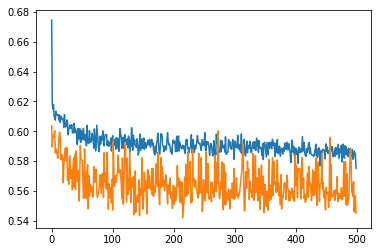

In [257]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

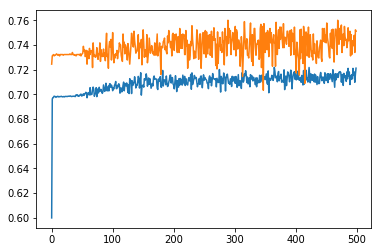

In [258]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

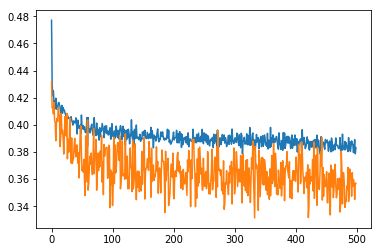

In [259]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [245]:
# plot_model(vae, to_file='model.png')

In [ ]:
plt.plot(x_train[0,:100,:])

In [ ]:
result.shape

In [ ]:
n1 = 30
i = 0
plt.subplot(211)
plt.plot(np.arange(n1), results[i][:n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)
plt.subplot(212)

plt.plot(np.arange(n1), x_train[i, :n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)

In [ ]:
mid = midi.decode_track(context, result)
dn = config.dataset_dir
# io.export_midifile(mid, dn + 'song_seq-seq.mid')

In [ ]:
results = []
latent_samples = []
for seq in x_test[-2:]:
    encoded = encode_sequence(np.stack([seq]))
    latent_samples.append(encoded)
    result = decode_sequence(encoded, encoder_model, decoder_model)
    results.append(result)
results[0].shape

In [ ]:
len(encoded)

In [ ]:
encoded[0].shape

In [ ]:
plt.plot(encoded[0][0,:10])
plt.plot(encoded[1][0,:10])

In [ ]:
e = np.array(latent_samples)
e.shape

In [ ]:
# reduce dimensionality
# e = e.reshape(e.shape[0],2,e.shape[-1])
e.shape

In [ ]:
e1.mean(axis=0).shape

In [ ]:
# new = e.transpose().mean(axis=1).transpose()
e1 = e[:,0] # state h
e2 = e[:,1] # state c
new = [e1.mean(axis=0), e2.mean(axis=0)]
# new = [[e[:,i].mean(axis=0)] for i in [0,1]]
plt.plot(new[0][0][:10])
len(new)

In [ ]:
e1.mean(axis=0).shape

In [ ]:
l[0].shape

In [ ]:
l = latent_samples[0]
len(l) # latent_sample :: (x,1,64)

In [ ]:
# new_ = decode_sequence(latent_samples[0], encoder_model, decoder_model)
new_ = decode_sequence(new, encoder_model, decoder_model)

In [ ]:
new_.shape

In [ ]:
plt.plot(new_[:100])

In [ ]:
plt.plot(results[0][:100])

In [ ]:
# results[0]

In [ ]:
mid_new = midi.decode_track(context, results[0])
io.export_midifile(mid_new, config.export_dir + 'real_mid_new_lstm.mid')

In [ ]:
x_test.shape

In [ ]:
# x_test, y_test = gen_xy_sin_to_f(3, f=2)

In [ ]:
results = model.predict([x_test,x_test])
results.shape

In [ ]:
# the 'true' results
i = 0
selection = int(x_test.shape[1] * 1)
full = np.concatenate([x_test[i,-selection:],y_test[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
# predicted results
i = 0
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
i = 2
selection = int(x_test.shape[1] * 1)
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
i = 0
selection = 1
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
def encoder(latent_dim, input_shape, intermediate_dim = 150):
    encoder_input = Input(shape=input_shape, name='encoder_input-')
    h = encoder_input
    
    # Convolve & Pool
#     h = Conv1D(10, kernel_size=2, strides=2, activation='relu', padding='same')(h)
#     h = Conv1D(50, kernel_size=2, strides=1, activation='relu', padding='same')(h)
#     h = MaxPooling1D(pool_size=2, strides=2, padding='same')(h)
#     h = Flatten()(h)
    
#     h = Dense(intermediate_dim, activation='relu')(h)
#     h = Dense(intermediate_dim, activation='relu')(h)
#     h = Dropout(0.05)(h)

    # Mean, Variance
    # h = Dense(intermediate_dim, activation='relu', name='encoder_h-')(h)
    z_mean = Dense(latent_dim, name='z_mean')(h) # , activation='relu'
    z_log_var = Dense(latent_dim, name='z_log_var')(h) # , activation='relu'

    encoder_output = [z_mean, z_log_var]
    encoder_model = Model(encoder_input, encoder_output, name='encoder_model-')
    return encoder_model, z_mean, z_log_var, encoder_input

def z_(latent_dim, epsilon_std):
    # sample z from a distribution defined by [input_mean, input_log_var]
    # input :: [z_mean, z_log_var]
    z_input = [Input(shape=(latent_dim,)), Input(shape=(latent_dim,))]
    sampling_ = lambda args: sampling(args, latent_dim, epsilon_std)
    z_output = Lambda(sampling_, name='z_sampler-')(z_input)
    # z_output = Lambda(sampling_, output_shape=(latent_dim,), name='z_sampler-')(z_input)
    z_model = Model(z_input, z_output, name='z_model-')
    return z_model

def decoder(latent_dim, input_shape, intermediate_dim = 150):
    z_input = Input(shape=(latent_dim,), name='decoder_input-')
    decoder_h = Dense(intermediate_dim, activation='relu', name='decoder_h-')
    h = decoder_h(z_input)
    
    # Convolve & Pool
#     h = Reshape((75,2))(h) # 75 * 2 = 150
#     h = UpSampling1D(2)(h)
#     h = Conv1D(10, kernel_size=2, strides=2, activation='relu', padding='same')(h)
#     h = Conv1D(20, kernel_size=2, strides=1, activation='relu', padding='same')(h)
#     h = MaxPooling1D(pool_size=2, strides=2, padding='same')(h)
    
#     h = UpSampling1D(2)(h)
#     h = Conv1D(30, kernel_size=2, strides=2, activation='relu', padding='same')(h)
#     h = Conv1D(40, kernel_size=2, strides=1, activation='relu', padding='same')(h)
#     h = MaxPooling1D(pool_size=2, strides=2, padding='same')(h)
    
#     h = Flatten()(h)
    h = Dense(intermediate_dim, activation='relu')(h)
    
    # Mean
    decoder_mean = Dense(original_dim, activation='sigmoid', name='decoder_mean-')
    x_decoded_mean = decoder_mean(h)
    h = Reshape(input_shape)(x_decoded_mean)
    decoder_output = h
    model = Model(inputs=z_input, outputs=decoder_output, name='decoder_model-')
    return model